In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pemanggilan data
data = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1. Eksplorasi Awal

a. Berdasarkan hasil output di bawah ini, diperoleh bahwa jumlah total penumpang dalam data tersebut adalah 891 orang.

In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


b. Berdasarkan hasil output tersebut, dapat diketahui bahwa banyaknya penumpang selamat adalah 342 orang, dan penumpang tidak selamat sebanyak 549 orang.

In [6]:
#Menampilkan banyaknya penumpang selamat dn tidak selamat
print(data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}))

Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


Menampilkan tabel

In [10]:
# Membuat tabel
tabel_survived = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}).reset_index()
tabel_survived.columns = ['Status', 'Jumlah']
print(tabel_survived)

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


Menampilkan grafik

<ipython-input-28-35b0863ca45e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Jumlah', data=tabel_survived, palette=['red', 'green'])


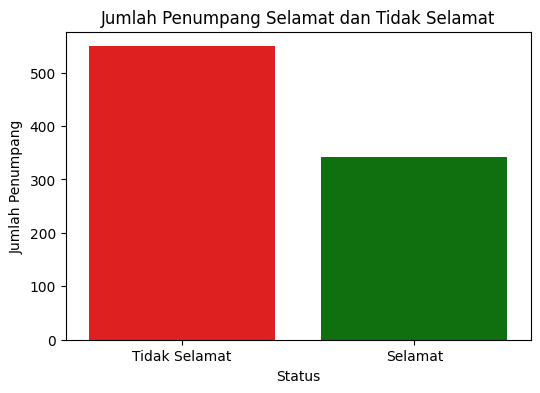

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x='Status', y='Jumlah', data=tabel_survived, palette=['red', 'green'])
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah Penumpang')
plt.show()

c. Rata-rata umur penumpang serta menentukan siapa penumpang termuda dan tertua

In [21]:
def format_umur(tahun_float):
    tahun = int(tahun_float)
    bulan = int(round((tahun_float - tahun) * 12))
    return f"{tahun} tahun {bulan} bulan"

# Rata-rata umur penumpang
rata_rata_umur = data['Age'].mean()
print(f"Rata-rata umur penumpang: {format_umur(rata_rata_umur)}")

# Penumpang termuda
termuda = data.loc[data['Age'].idxmin()]
print("\nPenumpang Termuda:")
print(f"Nama: {termuda['Name']}")
print(f"Umur: {format_umur(termuda['Age'])}")

# Penumpang tertua
tertua = data.loc[data['Age'].idxmax()]
print("\nPenumpang Tertua:")
print(f"Nama: {tertua['Name']}")
print(f"Umur: {format_umur(tertua['Age'])}")

Rata-rata umur penumpang: 29 tahun 8 bulan

Penumpang Termuda:
Nama: Thomas, Master. Assad Alexander
Umur: 0 tahun 5 bulan

Penumpang Tertua:
Nama: Barkworth, Mr. Algernon Henry Wilson
Umur: 80 tahun 0 bulan


Berdasarkan hasil output di atas, diperoleh informasi bahwa rata-rata umur penumpang adalah 29 tahun 8 bulan.

Penumpang termuda bernama Master. Assad Alexander Thomas yang berusia 5 bulan, sedangkan penumpang tertua bernama Mr. Algernon Henry Wilson Barkworth yang berusia 80 tahun.

d. Jumlah penumpang berdasarkan jenis kelamin

In [22]:
# Menghitung jumlah penumpang berdasarkan jenis kelamin
jumlah_jk = data['Sex'].value_counts()

# Menampilkan hasil
print("Jumlah Penumpang Berdasarkan Jenis Kelamin:")
print(jumlah_jk)

Jumlah Penumpang Berdasarkan Jenis Kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


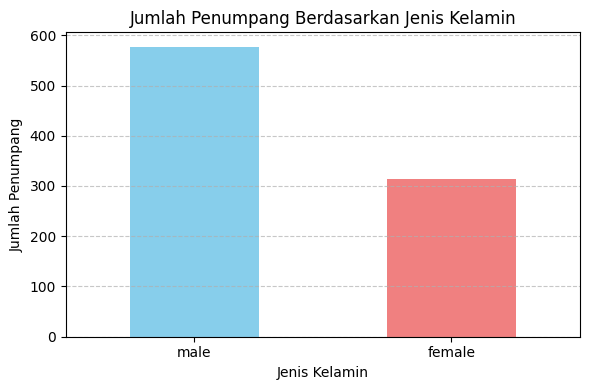

In [27]:
plt.figure(figsize=(6, 4))
jumlah_jk.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Diperoleh informasi bahwa jumlah penumpang berdasarkan jenis kelamin laki-laki adalah 577 orang, sedangkan jumlah penumpang perempuan sebanyak 314. Jadi penumpang laki-laki memiliki jumlah yang lebih banyak.

e. Jumlah penumpang berdasarkan kelas

Jumlah Penumpang Berdasarkan Kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang di Kelas 1: 24.24%


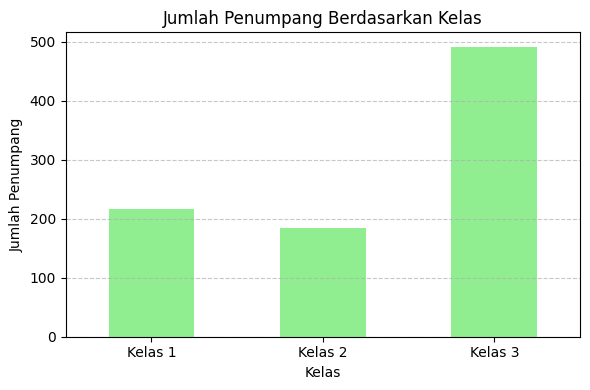

In [26]:
# Jumlah penumpang berdasarkan kelas
jumlah_kelas = data['Pclass'].value_counts().sort_index()

# Menampilkan jumlah penumpang per kelas
print("Jumlah Penumpang Berdasarkan Kelas:")
print(jumlah_kelas)

# Menghitung persentase penumpang di kelas 1
total_penumpang = len(data)
persen_kelas_1 = (jumlah_kelas[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di Kelas 1: {persen_kelas_1:.2f}%")

# Visualisasi
plt.figure(figsize=(6, 4))
jumlah_kelas.plot(kind='bar', color='lightgreen')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks(ticks=[0, 1, 2], labels=['Kelas 1', 'Kelas 2', 'Kelas 3'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Jumlah penumpang pada kelas 1 adalah 216 orang, jumlah penumpang pada kelas 2 sebanyak 184 orang, dan jumlah penumpang kelas 3 ada 491 orang.

Penumpang yang berada di kelas 1 sebanyak 24,24% dari total data.

# 2. Preprocessing

a. Deteksi Missing Values

In [29]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

Terdapat missing value pada data tersebut, yaitu sebanyak 866 missing values. Missing values terdapat pada kolom Age sebanyak 177, kolom Cabin sebanyak 687, dan kolom Embarked sebanyak 2. Langkah selanjutnya adalah menangani missing values.

b. Handling Missing Values

In [41]:
#Age
#melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Data pada kolom age berupa data numerik. Jika dilihat pada array terdapat angka kecil seperti 0.42, 0.67, 0.75, 0.83 dan juga terdapat angka besar seperti 80. Artinya distribusi umur tidak merata yang mengindikasikan adanya outlier. Jadi penanganan missing values pada kolom age sebaiknya menggunakan median karena median tidak terpengaruh terhadap outlier.

In [35]:
#mengisi missing value
data['Age']=data['Age'].fillna(data['Age'].median())

In [37]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

In [43]:
#Cabin
#melihat isi dalam kolom Cabin
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Karena Cabin adalah data kategori, bukan angka yang dapat dijumlahkan atau dirata-ratakan, maka mode lebih cocok digunakan untuk mengisi kategori yang kosong, agar tidak merusak struktur data. Selain itu pada kolom Cabin juga terdapat nan sehingga tidak bisa menggunakan mean atau median seperti pada data numerik.

In [47]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [48]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(0)

In [49]:
#Embarked
#melihat isi dalam kolom Embarked
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Sama seperti kolom Cabin, pada kolom Embarked terdapat nan sehingga tidak bisa menggunakan mean atau median seperti pada data numerik. Data pada Embarked berupa data kategori. Dalam hal ini, mode lebih cocok digunakan karena sebagian besar penumpang memiliki pelabuhan tempat naik ke kapal yang sama, sehingga mengisi missing value dengan nilai mode akan mempertahankan distribusi data yang asli dan mengurangi bias.

In [50]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [51]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(0)

c. Cek Outlier

Outlier merupakan adalah objek data yang menyimpang signifikan dari objek lainnya dalam suatu kelompok data.

Kolom yang paling masuk akal untuk dicek outliernya adalah kolom Age dan Fare, karena range nilainya besar dan kemungkinan terdapat nilai ekstrem. Nilai ekstrem dapat membuat analisis bias atau mengganggu model prediksi jika tidak ditangani.

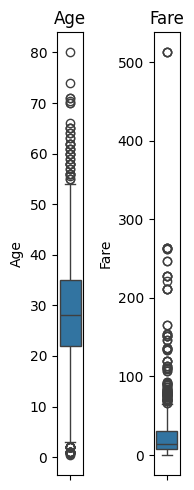

In [59]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age','Fare']

# Visualisasi Boxplot
plt.figure(figsize=(2, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [136]:
#IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 42 outliers
Fare: 116 outliers


Interpretasi:

- Age

  Pada kolom Age, terdapat 42 outlier. Sebagian besar data berada dalam rentang umur sekitar 20 hingga 40 tahun, tetapi terdapat beberapa data dengan umur yang sangat rendah (bayi) dan sangat tinggi (di atas 60 tahun) yang dianggap sebagai outlier. Artinya, distribusi umur penumpang cukup normal, namun terdapat beberapa individu dengan umur ekstrem yang perlu diperhatikan dalam analisis.

- Fare (harga tiket)

  Pada kolom Fare, terdapat 116 outlier. Sebagian besar harga tiket berada dalam rentang yang lebih rendah (dekat dengan 0–100), tetapi ada beberapa tiket dengan harga sangat tinggi (di atas 500) yang dianggap sebagai outlier. Artinya, harga tiket dalam dataset Titanic memiliki distribusi yang right-skewed (positively skewed), dengan beberapa penumpang membayar tiket jauh lebih mahal dibandingkan mayoritas penumpang lainnya.


d. Menangani Outlier

Outlier pada data tersebut perlu ditangani menggunakan metode Winsorizing karena outlier cukup banyak.

In [65]:
#Menangani Outlier dengan Winsorizing
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

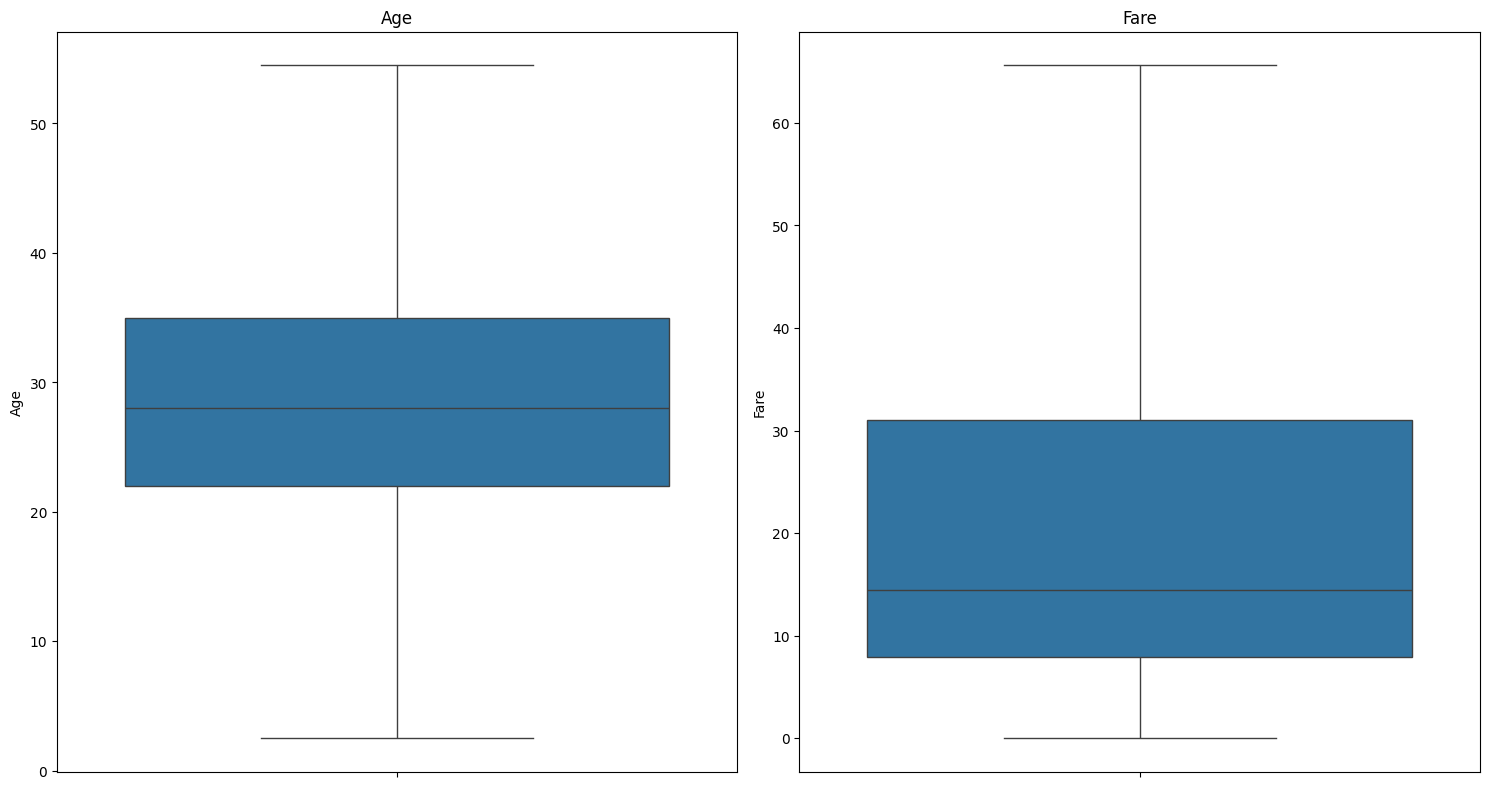

In [66]:
#cek boxplot kembali

num_cols = ['Age','Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

e. Standarisasi

Standarisasi dilakukan untuk menyamakan skala antar fitur dalam dataset. Hal ini diperlukan karena setiap fitur, seperti Age dan Fare, memiliki satuan dan rentang nilai yang berbeda-beda. Perbedaan skala ini dapat menyebabkan algoritma machine learning menjadi bias terhadap fitur yang memiliki nilai lebih besar. Dengan melakukan standarisasi, setiap fitur akan memiliki nilai rata-rata (mean) sebesar 0 dan standar deviasi sebesar 1. Hal ini bertujuan agar semua fitur berkontribusi secara seimbang dalam proses pembelajaran model.

In [109]:
from sklearn.preprocessing import StandardScaler
# Standarisasi kolom numerik: Age dan Fare
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Fare'] = scaler.fit_transform(data[['Fare']])

In [111]:
# Tampilkan data
data[['Age','Fare']].head()

,Age,Fare
0,-0.583432,-0.820552
1,0.742685,2.031623
2,-0.251903,-0.787578
3,0.494038,1.419297
4,0.494038,-0.781471


# Modelling

a. Proses membagi data menjadi data training dan data testing

Tujuan utama membagi data menjadi data training dan data testing adalah untuk mengevaluasi performa model machine learning secara objektif dan realistis. Dengan membagi data, kita dapat mengukur seberapa baik model dapat menggeneralisasi ke data baru yang belum pernah dilihat sebelumnya.

In [114]:
#memisahkan data menjadi variabel x dan y
X = data.drop('Survived', axis=1)
y = data['Survived']

In [116]:
from sklearn.model_selection import train_test_split

# Membagi data (contoh: 80% data training, 20% data testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Cek ukuran data
print(f"Jumlah data training: {X_train.shape[0]} data")
print(f"Jumlah data testing: {X_test.shape[0]} data")

Jumlah data training: 712 data
Jumlah data testing: 179 data


In [117]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.         0.82692308 0.         ... 0.         0.         0.        ]
 [0.5        0.39423077 0.         ... 0.         0.         0.        ]
 [1.         0.56730769 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.74038462 0.25       ... 0.         0.         0.        ]
 [0.         0.22115385 0.125      ... 0.         0.         0.        ]
 [0.         0.35576923 0.         ... 0.         0.         0.        ]]


b. Dataset dibagi dengan proporsi 80% untuk data training dan 20% untuk data testing.
Proporsi ini dipilih karena memberikan keseimbangan yang baik antara jumlah data yang cukup untuk melatih model dan data yang memadai untuk mengevaluasi performa model secara akurat. Selain itu, pembagian 80:20 merupakan standar umum yang banyak digunakan dalam praktik machine learning.

c. Model Klasifikasi

**Naive Bayes**

Naive Bayes adalah algoritma klsifikasi berbasis Teorema Bayes yang mengasumsikan bahwa antar fitur saling independen satu sama lain. Cara kerjanya yaitu sebagai berikut.

In [119]:
# Import library dan inisialisasi model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [120]:
# fit train set menggunakan Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [121]:
# Menghitung akurasi data training
nb.score(X_train, y_train)

0.4157303370786517

In [122]:
# Melakukan prediksi data
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [123]:
# Menghitung akurasi data test
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.4916


**Neural Network**

Model Neural Network seperti MLPClassifier adalah metode pembelajaran mesin yang terinspirasi dari cara kerja otak manusia. Neural network terdiri dari sejumlah neuron (unit pemrosesan) yang tersusun dalam lapisan (layer). Adapun cara kerjanya dijelaskan sebagai berikut.



In [124]:
#Menguji parameter yang paling optimum untuk model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


# Menentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Melakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [125]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 300}


In [126]:
# Import library yang dibutuhkan
from sklearn.neural_network import MLPClassifier

# Inisialisasi model MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

# Melatih model (fit) ke data train
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [127]:
# Memprediksi data test
y_pred = clf.predict(X_test)

In [128]:
# Evaluasi model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [129]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred),3)

0.799

**KNN**

Nearest Neighbor atau K-Nearest Neighbor (KNN) merupakan salah satu algoritme klasifikasi dalam data mining yang memanfaatkan data terdekat untuk melakukan prediksi pada data baru yang belum dikenal (data uji). Adapun langkah kerjanya sebagai berikut.

In [134]:
# Import dan buat model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [131]:
# Melatih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
# Prediksi data uji
y_pred = knn.predict(X_test)

# Hitung akurasi
KNN_acc = accuracy_score(y_test, y_pred)

In [133]:
# Evaluasi model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('Akurasi KNN:', (KNN_acc))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

Akurasi KNN: 0.7932960893854749


d. Nilai Evaluasi

- Naive Bayes

  akurasi: 0.4916
  artinya, Model Naive Bayes berhasil memprediksi benar sekitar 49.16% dari semua data yang diuji.
- Neural Network

  akurasi: 0.799
  artinya, Model Neural Network berhasil memprediksi dengan benar sekitar 79.9% dari semua data yang diuji
  
- KNN

  akurasi: 0.7932
  artinya, Model Neural Network berhasil memprediksi dengan benar sekitar 79.32% dari semua data yang diuji


e. Kesimpulan

Berdasarkan hasil tersebut, algoritma yang paling bagus digunakan adalah Neural Network. Hal ini dapat disebabkan karena Neural Network mampu menangkap pola yang lebih kompleks dalam data. Neural Network juga lebih fleksibel dalam menangani hubungan non-linear antar fitur, sehingga menghasilkan akurasi yang lebih tinggi dalam prediksi.

# Evaluasi

a. Nilai untuk prediksi penumpang yang selamat (kelas 1):

- Precision = 0.77


- Recall = 0.73
  




b. Menentukan banyak penumpang yang diprediksi selamat, dan jumlah diantaranya benar-benar selamat

In [138]:
# Diketahui
precision = 0.77
recall = 0.73
actual_positive = 74  # Jumlah penumpang yang benar-benar selamat

# Hitung total yang diprediksi selamat
total_predicted_positive = TP / precision

# Hitung jumlah yang benar-benar selamat dan diprediksi selamat (True Positive)
TP = recall * actual_positive

# Cetak hasil
print(f"Penumpang yang diprediksi selamat: {round(total_predicted_positive)} orang")
print(f"Di antaranya benar-benar selamat: {round(TP)} orang")

Penumpang yang diprediksi selamat: 70 orang
Di antaranya benar-benar selamat: 54 orang


Jadi, penumpang yang diprediksi selamat ada 70 orang, dan diantaranya yang benar-benar selamat ada 54 orang.